In [1]:
import os
import matplotlib.pyplot as plt
import importlib
import pandas as pd
import numpy as np
# Please make sure we can find the Automated CE folder
path_to_automatedCE = None
if path_to_automatedCE is None:
    path_to_automatedCE = os.getcwd()
assert os.getcwd().find("AutomatedCE") >0, "Please enter the path to the AutomatedCE folder above"
path_to_automatedCE = path_to_automatedCE[:path_to_automatedCE.find("AutomatedCE")+11]

# Change the path to our automatedCE 
os.chdir(path_to_automatedCE)
# Import Utility Functions
from L4 import image_util, CellDetection


In [3]:
%matplotlib qt

In [4]:
# label Images here
img_dir = r"D:\Scripts\working-at-home\fiji-haesleinhuepf\images\cells"
fig, axes = plt.subplots()
labels = ['cell', 'dust']
im_background = CellDetection.get_background_image(img_dir)
labeler =  image_util.Labeler(axes, labels=labels)
for image, im_file in image_util.image_iterator():
    im_plot=axes.imshow(image)
    blobs = CellDetection.get_blobs(image, 'scikit_threshold', im_background )
    labeler.draw_labels(blobs)
    df = pd.DataFrame.from_dict(labeler.get_labels())
    out_file = im_file[:-4]+"_labels.csv"
    df.to_csv(out_file)
    
    # Wait for the user to press a key (any key, jut not a mouse press) before continuing
    while not plt.waitforbuttonpress():
        pass  
    labeler.remove_patches()
    axes.clear()

    


MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
Near corner 0
Near corner 0
MouseButton.LEFT False
Near corner 1
Near corner 1
MouseButton.LEFT False
up True
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
Near corner 0
Near corner 0
MouseButton.LEFT False
Near corner 3
Near corner 3
MouseButton.LEFT False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blo

MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: True
hey all
MouseButton.RIGHT False
MouseButton.RIGHT False
blob enable: False
MouseButton.MIDDLE False
Yolo
0.9386252376907578,0.0
Yolo
14.079378565359889,5.631751426143978
Yolo
15.018003803050647,5.631751426143978
Yolo
19.71112999150398,8.44762713921591
Yolo
20.64975522919451,9.386252376906555
Yolo
20.64975522919451,11.263502852287

In [8]:
# Compare results here 

open_range = range(1,21,2)
close_range = range(1,21,2)

fig.number

1

In [10]:
out_data = r"D:\Scripts\working-at-home\fiji-haesleinhuepf\images\cells\000024255_labels.csv"
truth = pd.read_csv(out_data)

In [58]:
def from_df_to_list(df):
    """
    Takes bounding box data from a data frame and puts it into a list
    """
    blobs = []
    for index, row in df.iterrows():
        new_blob = image_util.Blob()
        new_blob.from_dataframe(row)
        blobs.append(new_blob)
    return blobs

def compare_blobs_iou(blobs_test, blobs_truth):
    """
    Calculates the Intersection over union of a series of test blobs and their corresponding truth blobs
    """
    scores = []
    for true_blob in blobs_truth:
        max_iou = 0
        
        for blob in blobs_test:
            iou = blob.get_blob_iou(true_blob)
            if iou > max_iou:
                max_iou = iou
        scores.append(max_iou)
    return np.asarray(scores)
    


In [2]:
importlib.reload(image_util)
importlib.reload(CellDetection)

<module 'L4.CellDetection' from 'D:\\Scripts\\AutomatedCE\\L4\\CellDetection.py'>

In [62]:
def get_avg_score(img_dir, close_size=1, open_size=1):
    # label Images here
    if img_dir is None:
        img_dir = r"D:\Scripts\working-at-home\fiji-haesleinhuepf\images\cells"
    labels = ['cell', 'dust']
    im_background = CellDetection.get_background_image(img_dir)
    average_score = []
    for image, im_file in image_util.image_iterator():
        #im_plot=axes.imshow(image)
        blobs = CellDetection.get_blobs(image, 'scikit_threshold', im_background, close_size=close_size, open_size=open_size)

        try:
            in_file = im_file[:-4]+"_labels.csv"
            truth = pd.read_csv(in_file)

        except FileNotFoundError:
            print("The following image is not labeled: {}".format(im_file))
            continue


        truth_blobs = from_df_to_list(truth)
        scores = compare_blobs_iou(blobs, truth_blobs)
        average_score.append( np.sum(scores)/len(truth_blobs))
    return np.median(average_score)

get_avg_score(None, close_size = 7, open_size = 11)

0.2944350550049079

In [44]:
summed_scores

[0.4552147208725583,
 0.3372749391727494,
 0.2636652752440044,
 0.031339031339031334,
 0.3014361345950552,
 0.368303231519369,
 0.3180059311321538,
 0.4697014925373134,
 0.5334647903309813,
 0.47474836916693736,
 0.5396596374398815,
 0.46116138763197584,
 0.29828506009357075,
 0.3320508413155472,
 0.7620392156862745,
 0.6046074419768811,
 0.6324572523133675,
 0.23148148148148148,
 0.37228673472291673,
 0.09841556669857367,
 0.13730068101503887]

In [63]:
# Parameterize Settings

close_sizes = [7,11]
open_sizes = [7]

cols = []
for close_d in close_sizes:
    row = []
    for open_d in open_sizes:
        row.append(get_avg_score(None, close_size = close_d, open_size = open_d))
        print(f"Close Size: {close_d}, Open Size: {open_d}, avg score: {row[-1]}")
    cols.append(row)
    

Close Size: 7, Open Size: 7, avg score: 0.48117647058823526
Close Size: 11, Open Size: 7, avg score: 0.6514285714285714


In [22]:
# Parameterize Settings for Multiprocessing

close_sizes = range(1,21,2)
open_sizes = range(1,21,2)

cols = []
for close_d in close_sizes:
    row = []
    for open_d in open_sizes:
        row.append(get_avg_score(None, close_size = close_d, open_size = open_d))
        print(f"Close Size: {close_d}, Open Size: {open_d}, avg score: {row[-1]}")
    cols.append(row)

[(0.0, 73.0), 62.0, 65.0]

In [23]:
xy, w, h = truth_blobs[0].get_bbox()
xy

(0.0, 73.0)

In [31]:
x = [1,4,1,56,1,4]

In [34]:
print(x)

[1, 1, 1, 4, 4, 56]


In [20]:
close_sizes = range(1,21,1)
open_sizes = range(1,21,1)
arguments = []
for close_d in close_sizes:
    for open_d in open_sizes:
        arguments.append([None,close_d, open_d])
len(arguments)

400

In [4]:
f = CellDetection.get_avg_score

In [21]:
from multiprocessing import Pool

if __name__ == '__main__':
    with Pool(processes=16) as pool:  
        
        result = pool.starmap(f, arguments)
        
        

In [22]:
r = np.asarray(result)

In [23]:
r.shape

(400, 3)

In [24]:
scores = r[:,2]
scores.argmax()

206

In [25]:
r[206,:]

array([11.        ,  7.        ,  0.65142857])

In [26]:
max(scores)

0.6514285714285714

In [27]:
a = r.copy()


In [28]:
a[a[:,0].argsort()]

array([[ 1.        ,  1.        ,  0.19874896],
       [ 4.        ,  1.        ,  0.38306594],
       [ 5.        ,  1.        ,  0.3737365 ],
       ...,
       [17.        , 20.        ,  0.04314477],
       [ 9.        , 20.        ,  0.        ],
       [20.        , 20.        ,  0.04314477]])

In [33]:
a = a[a[:,1].argsort()] # First sort doesn't need to be stable.
a = a[a[:,0].argsort(kind='mergesort')]


In [34]:
a

array([[ 1.        ,  1.        ,  0.19874896],
       [ 1.        ,  2.        ,  0.17722529],
       [ 1.        ,  3.        ,  0.08696821],
       ...,
       [20.        , 18.        ,  0.09756674],
       [20.        , 19.        ,  0.0853983 ],
       [20.        , 20.        ,  0.04314477]])

In [40]:
b = a[:,2]

In [43]:
b = b.reshape(20,20)

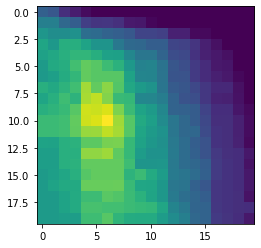

In [44]:
plt.imshow(b)